## MNIST Example with TensorFlow

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
# Import MNIST data
#Sets the threshold for what messages will be logged.
old_v = tf.logging.get_verbosity()
# able to set the logging verbosity to either DEBUG, INFO, WARN, ERROR, or FATAL. Here its ERROR
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)
#in the end
tf.logging.set_verbosity(old_v)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [5]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

2019-11-15 00:43:24,257 From C:\Users\chaey\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [7]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.450760
Step 1000: Minibatch Loss: 0.124206
Step 2000: Minibatch Loss: 0.110506
Step 3000: Minibatch Loss: 0.098741
Step 4000: Minibatch Loss: 0.093994
Step 5000: Minibatch Loss: 0.084787
Step 6000: Minibatch Loss: 0.081010
Step 7000: Minibatch Loss: 0.079475
Step 8000: Minibatch Loss: 0.077939
Step 9000: Minibatch Loss: 0.076109
Step 10000: Minibatch Loss: 0.074126
Step 11000: Minibatch Loss: 0.071723
Step 12000: Minibatch Loss: 0.071379
Step 13000: Minibatch Loss: 0.072453
Step 14000: Minibatch Loss: 0.067923
Step 15000: Minibatch Loss: 0.065970
Step 16000: Minibatch Loss: 0.062116
Step 17000: Minibatch Loss: 0.061412
Step 18000: Minibatch Loss: 0.061081
Step 19000: Minibatch Loss: 0.058171
Step 20000: Minibatch Loss: 0.059417
Step 21000: Minibatch Loss: 0.058141
Step 22000: Minibatch Loss: 0.056299
Step 23000: Minibatch Loss: 0.055709
Step 24000: Minibatch Loss: 0.055414
Step 25000: Minibatch Loss: 0.055686
Step 26000: Minibatch Loss: 0.054699
Step 27000: Mi

Original Images


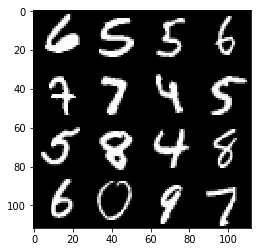

Reconstructed Images


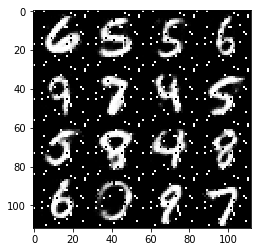

In [8]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

## PCA on MNIST with TensorFlow

Let's get started, import the TensorFlow library into your program:

In [9]:
import tensorflow as tf

Load and prepare the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using [Keras](https://keras.io/). Convert the samples from integers to floating-point numbers:

In [10]:
mnist = tf.keras.datasets.mnist
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

11493376/11490434 [==============================] - 2s 0us/step


Top 30 eigenvalues: 
 [5.11687301 3.74139084 3.25270845 2.8416207  2.56711774 2.27366339
 1.72515498 1.52056024 1.45630525 1.24275009 1.11208951 1.06664054
 0.90468083 0.89218122 0.83235305 0.78190032 0.69838687 0.67325581
 0.62599524 0.60776302 0.56214588 0.53079883 0.50278025 0.48114703
 0.4657832  0.44253869 0.42843961 0.41461871 0.39266734 0.36426179]

Cumulative variance values:
 [ 5.11687301  8.85826384 12.1109723  14.95259299 17.51971074 19.79337412
 21.51852911 23.03908935 24.4953946  25.73814469 26.8502342  27.91687474
 28.82155557 29.7137368  30.54608984 31.32799017 32.02637704 32.69963285
 33.32562809 33.93339111 34.49553699 35.02633582 35.52911607 36.01026311
 36.47604631 36.918585   37.3470246  37.76164331 38.15431065 38.51857244]

Observations:
The eigenfaces resemble the underlying patterns that generate each number. Numbers that can be represented as 
combinations of other eigenfaces are not clearly shown in the plot below. For example 0, 6, 9, 3, 5, ~7 can be seen 
alm

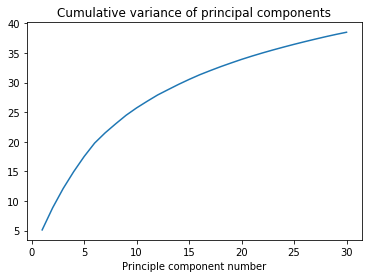

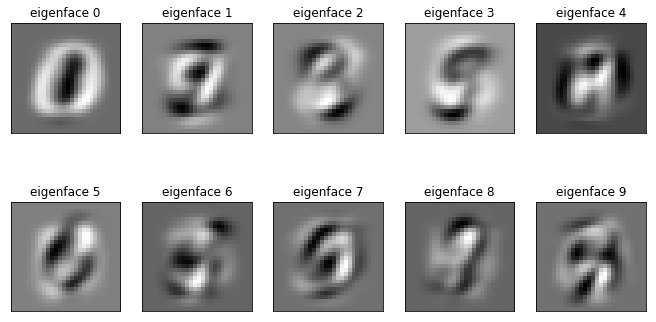

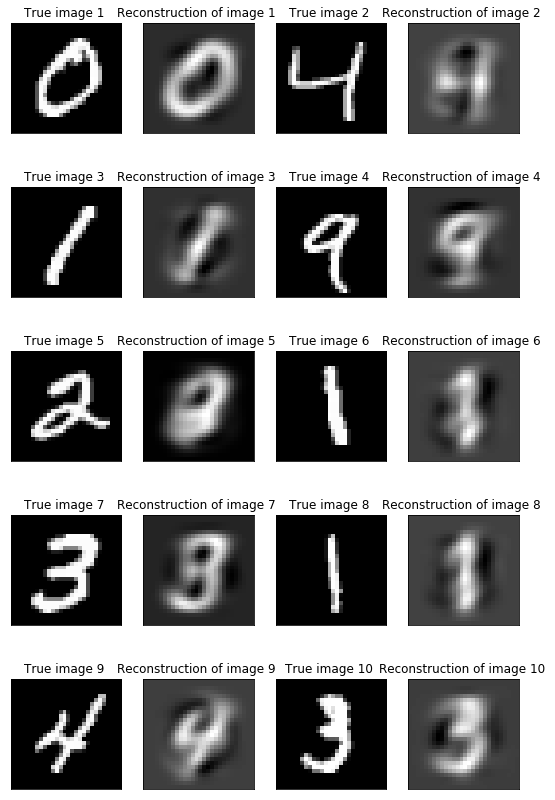

In [11]:
# Note: You need to reshape the data from images to vectors in order to use PCA
# Your code with comments and output

x_train_mnist_reshape = np.reshape(x_train_mnist, newshape = (x_train_mnist.shape[0], x_train_mnist.shape[1]*x_train_mnist.shape[2]))
x_test_mnist_reshape = np.reshape(x_test_mnist, newshape = (x_test_mnist.shape[0], x_test_mnist.shape[1]*x_test_mnist.shape[2]))

# Determine the dimensions of images, number of features in the data and the number of different digits. 150 = number of prinicpal components.
h_mnist, w_mnist = x_train_mnist.shape[1:]
no_features = x_train_mnist_reshape.shape[1]
no_classes = np.unique(y_train_mnist).shape[0]
no_components = 150

# fit pca to the training data

pca_mnist = PCA(n_components=no_components, svd_solver='randomized',
          whiten=True).fit(x_train_mnist_reshape)

# top 30 eigenvalues
print('Top 30 eigenvalues: \n', pca_mnist.explained_variance_[:30])

# Cumulative variance
cumulative_variance = np.cumsum(pca_mnist.explained_variance_[:30])
print('\nCumulative variance values:\n',cumulative_variance)

# Plot cumulative variance
plt.plot(range(1, cumulative_variance.shape[0]+1), cumulative_variance)
plt.title('Cumulative variance of principal components')
plt.xlabel('Principle component number')    
    
eigenfaces_mnist = pca_mnist.components_.reshape((no_components, h_mnist, w_mnist))

eigenface_titles_mnist = ["eigenface %d" % i for i in range(eigenfaces_mnist.shape[0])]

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# Plot top 10 eigenfaces
plot_gallery(eigenfaces_mnist, eigenface_titles_mnist, h_mnist, w_mnist, n_row = 2, n_col = 5)

# Observations

print("\nObservations:\nThe eigenfaces resemble the underlying patterns that generate each number. Numbers that can be represented as \ncombinations of other eigenfaces are not clearly shown in the plot below. For example 0, 6, 9, 3, 5, ~7 can be seen \nalmost clearly from the plots below whereas the remaining numbers are not so clear, because they can be constructed \nfrom combinations of the other eigenfaces. PCA when applied to handwritten digit recognition captures the 'strokes'\nthat are most used when constructing a number, here '0' is the most common stroke, seen in the numbers 6, 8, 9, 3,\nin fact can see that the upper part of the first eigenvector is more narrow - because of digits like 8. As the \neigenvector number increases, we see lower resemblence of the eigenvectors to the digits.")

# Reconstruct data using top 10 components

pca_object = PCA(n_components = 10, svd_solver='randomized', whiten=True)
x_train_mnist_intmde = pca_object.fit_transform(x_train_mnist_reshape)
x_train_mnist_approx = pca_object.inverse_transform(x_train_mnist_intmde)

# Reconstruction error calculation

reconstruction_error = np.sum(np.square(x_train_mnist_reshape - x_train_mnist_approx))/(x_train_mnist_reshape.shape[0]*x_train_mnist_reshape.shape[1])
print("\nMean squared error:%f"%(reconstruction_error))

# Plot 10 reconstructed images

reconstruction_titles = ["True image %d " % i for i in range(y_train_mnist.shape[0])]
true_titles = ["Reconstruction of image %d " % i for i in range(y_train_mnist.shape[0])]

def plot_gallery_2(images1, images2, titles1, titles2, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(1, n_row * n_col+1):
        plt.subplot(n_row, n_col, 2*i - 1)
        plt.imshow(images1[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles1[i], size=12)
        plt.xticks(())
        plt.yticks(())
        plt.subplot(n_row, n_col, 2*i)
        plt.imshow(images2[i].reshape((h,w)), cmap = plt.cm.gray)
        plt.title(titles2[i], size = 12)
        plt.xticks(())
        plt.yticks(())        
        if 2*i == n_row*n_col or 2*i - 1 == (n_row*n_col - 1):
            break
plot_gallery_2(x_train_mnist_reshape, x_train_mnist_approx, reconstruction_titles, true_titles, h_mnist, w_mnist, n_row = 5, n_col =4)

In [12]:
print(x_train_mnist_approx.shape)

(60000, 784)


Digits 4 and 2 have been selected.

Eigenvector observations:
Since we are only looking at handwritten digits of 4 and 2, the most common patterns to writing 4 and 2 are revealed more explicitly here in comparison to questions 3. The patterns involved in constructing 4 and 2 are different and
this is expressed by our PCA with the fact that the top two eigenvectors resemble the digits 4 and 2. If the digits
were close in construction e.g 5 and 6 we would see less of a distinction between the first and second eigenvectors. The third eigenvector here shows the pattern that is common to both 4 and 2, a pattern resembling the digit 7.
Another observation is that the top two eigenvectors for digits 4 and 2 do no appear explicitly in the eigenvector
plots in the above question, since the above questions PCA is attempting to extract the main patterns from digits 0-9 whereas here we only have two digits.


K-means observations:
From the 2d representation of the original data, we can see a linea

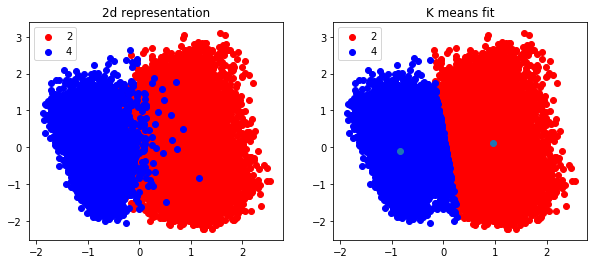

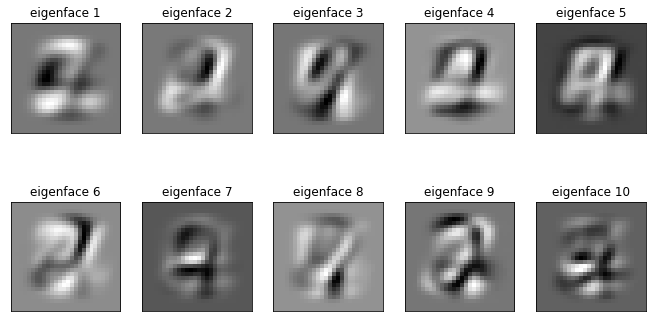

In [13]:
# Your code with comments and output
print('Digits 4 and 2 have been selected.\n')
# Include data with only digits 2 and 4

x_train_mnist_2 = x_train_mnist[(y_train_mnist[:] == 2) | (y_train_mnist[:] == 4)]
y_train_mnist_2 = y_train_mnist[(y_train_mnist[:] == 2) | (y_train_mnist[:] == 4)]
h_mnist, w_mnist = x_train_mnist.shape[1:]
x_train_mnist_2_reshape = np.reshape(x_train_mnist_2, newshape = (x_train_mnist_2.shape[0], h_mnist*w_mnist))

# number of features, number of classes and number of principal components to calculate

no_features = x_train_mnist_2_reshape.shape[1]
no_classes = np.unique(y_train_mnist_2).shape[0]
no_components = 150

# fit PCA

pca_mnist_2 = PCA(n_components=no_components, svd_solver='randomized', whiten=True).fit(x_train_mnist_2_reshape)

# extract eigenfaces

eigenfaces_mnist_2 = pca_mnist_2.components_.reshape((no_components, h_mnist, w_mnist))

# eigenface titles

eigenface_titles_mnist_2 = ["eigenface %d" % i for i in range(1, eigenfaces_mnist_2.shape[0]+1)]

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Observations
print('Eigenvector observations:')
print('Since we are only looking at handwritten digits of 4 and 2, the most common patterns to writing 4 and 2 are revealed more explicitly here in comparison to questions 3. The patterns involved in constructing 4 and 2 are different and\nthis is expressed by our PCA with the fact that the top two eigenvectors resemble the digits 4 and 2. If the digits\nwere close in construction e.g 5 and 6 we would see less of a distinction between the first and second eigenvectors. The third eigenvector here shows the pattern that is common to both 4 and 2, a pattern resembling the digit 7.\nAnother observation is that the top two eigenvectors for digits 4 and 2 do no appear explicitly in the eigenvector\nplots in the above question, since the above questions PCA is attempting to extract the main patterns from digits 0-9 whereas here we only have two digits.\n')

# Transform data to 2d for k means

pca_object_2 = PCA(n_components = 2, svd_solver='randomized', whiten=True)
x_train_mnist_2d = pca_object_2.fit_transform(x_train_mnist_2_reshape)
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title("2d representation")
plt.scatter(x_train_mnist_2d[:, 0][y_train_mnist_2 == 2], x_train_mnist_2d[:, 1][y_train_mnist_2 == 2], c='r', label = '2')
plt.scatter(x_train_mnist_2d[:, 0][y_train_mnist_2 == 4], x_train_mnist_2d[:, 1][y_train_mnist_2 == 4], c='b', label = '4')
plt.legend()

# k means implementation

kmeans = KMeans(n_clusters=2, random_state=random_state).fit(x_train_mnist_2d)
plt.subplot(122)
plt.scatter(x_train_mnist_2d[:, 0][kmeans.labels_ == 1], x_train_mnist_2d[:, 1][kmeans.labels_ == 1], c = 'r', label = '2')#
plt.scatter(x_train_mnist_2d[:, 0][kmeans.labels_ == 0], x_train_mnist_2d[:, 1][kmeans.labels_ == 0], c = 'b', label = '4')#
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.title("K means fit")
plt.legend()

# k means observations
print('\nK-means observations:')
print('From the 2d representation of the original data, we can see a linear boundary that "mostly" separates data that are classified as digit 2 from data classified as digit 4. However there is data from each class that lies on the wrong side of the boundary. As can be seen with kmeans, these data are incorrectly classified. This is because our k means algorithm is concerned with separating the data into two clusters by distance from a cluster center only. As a result, these data points that are close to data from the other class are incorreclty classified.')

# Plot top 10 eigenfaces
print('\nPlotting top 10 eigenfaces..')
plot_gallery(eigenfaces_mnist_2, eigenface_titles_mnist_2, h_mnist, w_mnist, n_row = 2, n_col = 5)